# This is file to train model to predict gender. AI_SEM221


## I. Prepare

In [1]:
#link drive
from google.colab import drive
drive.mount('/content.drive/')

Mounted at /content.drive/


In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [4]:
# change to current folder
%cd /content/drive/MyDrive/AI_Project//
! ls

/content/drive/MyDrive/AI_Project
gender-classification-dataset.zip  training_gender_recognition.ipynb
gender_detect.model		   Validation
Training


# II. dowload dataset from kaggle

In [ ]:
from google.colab import files
!pip install -q kaggle

In [ ]:
uploaded = files.upload()

Saving kaggle.json to kaggle.json


In [ ]:
!mkdir -p ~/.kaggle
!cp kaggle.json ~/.kaggle

In [ ]:
!kaggle datasets download -d cashutosh/gender-classification-dataset

 99% 267M/269M [00:10<00:00, 27.2MB/s]
100% 269M/269M [00:11<00:00, 25.7MB/s]


In [ ]:
!ls

gender-classification-dataset.zip  training_gender_recognition.ipynb
kaggle.json


In [ ]:
!unzip gender-classification-dataset.zip

# III. Import lib

In [5]:
import os, cv2, random
import numpy as np
import tensorflow as tf
import glob
import matplotlib.pyplot as plt 
from tensorflow import keras
from keras_preprocessing.image import img_to_array
from keras_preprocessing.image import ImageDataGenerator
from keras.models import Sequential
from keras.models import load_model
from keras import layers  
from keras.layers import BatchNormalization, Conv2D, MaxPooling2D, Activation, Flatten, Dropout, Dense
from sklearn.model_selection import train_test_split
from keras import backend as K

In [8]:
# dimensions of our images.
img_width, img_height = 96, 96
img_channel = 3
class_number = 2

train_data_dir = '/content/drive/MyDrive/Gender_recognition/Training'
validation_data_dir = '/content/drive/MyDrive/Gender_recognition/Validation'
nb_train_samples = 47009
nb_validation_samples = 11649
epochs = 50
batch_size = 128



In [6]:
def build(width, height, depth, classes):
    model = Sequential()

    if K.image_data_format() == 'channels_first':
        input_shape = (depth, width, height)
    else:
        input_shape = (width, height, depth)
    
    chanDim = -1

    model.add(Conv2D(32, (3,3), padding="same", input_shape=input_shape))
    model.add(Activation("relu"))
    model.add(BatchNormalization(axis=chanDim))
    model.add(MaxPooling2D(pool_size=(3,3)))
    model.add(Dropout(0.25))

    model.add(Conv2D(64, (3,3), padding="same"))
    model.add(Activation("relu"))
    model.add(BatchNormalization(axis=chanDim))

    model.add(Conv2D(64, (3,3), padding="same"))
    model.add(Activation("relu"))
    model.add(BatchNormalization(axis=chanDim))
    model.add(MaxPooling2D(pool_size=(2,2)))
    model.add(Dropout(0.25))

    model.add(Conv2D(128, (3,3), padding="same"))
    model.add(Activation("relu"))
    model.add(BatchNormalization(axis=chanDim))

    model.add(Conv2D(128, (3,3), padding="same"))
    model.add(Activation("relu"))
    model.add(BatchNormalization(axis=chanDim))
    model.add(MaxPooling2D(pool_size=(2,2)))
    model.add(Dropout(0.25))

    model.add(Flatten())
    model.add(Dense(1024))
    model.add(Activation("relu"))
    model.add(BatchNormalization())
    model.add(Dropout(0.5))

    model.add(Dense(classes))
    model.add(Activation("softmax"))

    return model

In [9]:
model = build(img_width, img_height, img_channel, class_number)

In [10]:
model.compile(loss="binary_crossentropy", optimizer="adam", metrics=["accuracy", tf.keras.metrics.Precision(), tf.keras.metrics.Recall()])

In [11]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 96, 96, 32)        896       
                                                                 
 activation (Activation)     (None, 96, 96, 32)        0         
                                                                 
 batch_normalization (BatchN  (None, 96, 96, 32)       128       
 ormalization)                                                   
                                                                 
 max_pooling2d (MaxPooling2D  (None, 32, 32, 32)       0         
 )                                                               
                                                                 
 dropout (Dropout)           (None, 32, 32, 32)        0         
                                                                 
 conv2d_1 (Conv2D)           (None, 32, 32, 64)        1

### Tạo data để train và validate -- load lên ram theo batch

In [ ]:
train_datagen = ImageDataGenerator(
    rescale=1. / 255,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True)

In [ ]:
validation_datagen = ImageDataGenerator(rescale=1. / 255)

In [ ]:
train_generator = train_datagen.flow_from_directory(
    train_data_dir,
    target_size=(img_width, img_height),
    batch_size=batch_size,
    class_mode='categorical')

Found 47009 images belonging to 2 classes.


In [ ]:
print(train_generator.class_indices)

{'female': 0, 'male': 1}


In [ ]:
validation_generator = validation_datagen.flow_from_directory(
    validation_data_dir,
    target_size=(img_width, img_height),
    batch_size=batch_size,
    class_mode='categorical')

Found 11649 images belonging to 2 classes.


In [ ]:
print(validation_generator.class_indices)

{'female': 0, 'male': 1}


### Train model

In [ ]:
H = model.fit_generator(
    train_generator,
    steps_per_epoch = nb_train_samples // batch_size,
    epochs = epochs,
    validation_data = validation_generator,
    validation_steps = nb_validation_samples // batch_size)


<ipython-input-16-aa112af7b357>:1: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  H = model.fit_generator(


Epoch 1/50
367/367 [==============================] - 208s 541ms/step - loss: 0.2621 - accuracy: 0.9066 - precision: 0.9066 - recall: 0.9066 - val_loss: 0.6330 - val_accuracy: 0.7834 - val_precision: 0.7834 - val_recall: 0.7834
Epoch 2/50
367/367 [==============================] - 182s 497ms/step - loss: 0.1588 - accuracy: 0.9422 - precision: 0.9422 - recall: 0.9422 - val_loss: 0.1048 - val_accuracy: 0.9609 - val_precision: 0.9609 - val_recall: 0.9609
Epoch 3/50
367/367 [==============================] - 183s 499ms/step - loss: 0.1331 - accuracy: 0.9509 - precision: 0.9509 - recall: 0.9509 - val_loss: 0.1129 - val_accuracy: 0.9596 - val_precision: 0.9596 - val_recall: 0.9596
Epoch 4/50
367/367 [==============================] - 182s 497ms/step - loss: 0.1244 - accuracy: 0.9549 - precision: 0.9549 - recall: 0.9549 - val_loss: 0.0846 - val_accuracy: 0.9694 - val_precision: 0.9694 - val_recall: 0.9694
Epoch 5/50
367/367 [==============================] - 184s 500ms/step - loss: 0.1205 - a

### ĐỒ thị giá trị sau train

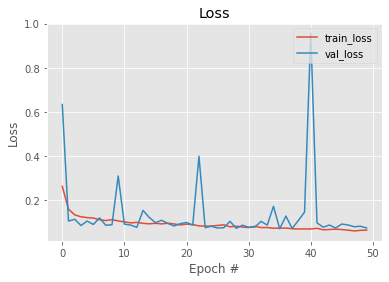

In [ ]:
# vẽ đồ thị giá trị loss sau khi huấn luyện
plt.style.use("ggplot")
plt.figure()
N = epochs
plt.title('Loss')
plt.plot(np.arange(0,N), H.history["loss"], label="train_loss")
plt.plot(np.arange(0,N), H.history["val_loss"], label="val_loss")
plt.xlabel("Epoch #")
plt.ylabel("Loss")
plt.legend(loc="upper right")
plt.show()


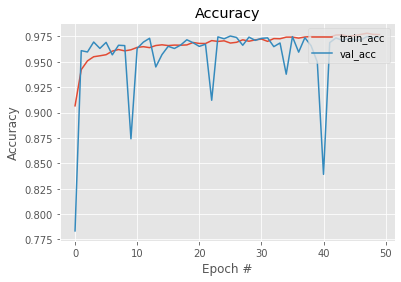

In [ ]:
# vẽ đồ thị giá trị độ chính xác sau khi huấn luyện
plt.style.use("ggplot")
plt.figure()
N = epochs
plt.title('Accuracy')
plt.plot(np.arange(0,N), H.history["accuracy"], label="train_acc")
plt.plot(np.arange(0,N), H.history["val_accuracy"], label="val_acc")
plt.xlabel("Epoch #")
plt.ylabel("Accuracy")
plt.legend(loc="upper right")
plt.show()

In [ ]:
model.save('gender_detect.model')